In [98]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns 
import plotly.express as px
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [50]:
# loading the dataset
df = pd.read_csv("infolimpioavanzadoTarget.csv")

In [51]:
df.head()

,date,open,high,low,close,adjclose,volume,ticker,RSIadjclose15,RSIvolume15,...,high-15,K-15,D-15,stochastic-k-15,stochastic-d-15,stochastic-kd-15,volumenrelativo,diff,INCREMENTO,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,17.760000,106600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.919758,-1.900001,-9.664295,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,17.660000,128700,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.110440,-1.379999,-7.247895,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,16.950001,103100,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.889560,-0.930000,-5.201344,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,16.170000,173600,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.497843,-0.360000,-2.177856,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,15.710000,137800,ASLE,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.188956,-0.120000,-0.758054,0


In [53]:
# taking important columns 

df = df[["date", "open", "high", "low", "close", "volume", "ticker", "TARGET"]]

In [54]:
df.head()

,date,open,high,low,close,volume,ticker,TARGET
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,106600,ASLE,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,128700,ASLE,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,103100,ASLE,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,173600,ASLE,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,137800,ASLE,0


In [55]:
df.dtypes


date       object
open      float64
high      float64
low       float64
close     float64
volume      int64
ticker     object
TARGET      int64
dtype: object

In [56]:
df["date"] = pd.to_datetime(df["date"])

C:\Users\acer\AppData\Local\Temp\ipykernel_11004\3228555721.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [57]:
df.dtypes

date      datetime64[ns]
open             float64
high             float64
low              float64
close            float64
volume             int64
ticker            object
TARGET             int64
dtype: object

In [58]:
df.columns

Index(['date', 'open', 'high', 'low', 'close', 'volume', 'ticker', 'TARGET'], dtype='object')

In [59]:
# making list of company  names 
ticker_list = df["ticker"].unique()
ticker_list 

array(['ASLE', 'ASLN', 'ASMB', 'ASML', 'ASND', 'ASO', 'ASPA', 'ASPAU',
       'ASPS', 'ASRT', 'ASRV', 'ASTC', 'ASTE', 'ASTL', 'ASTR', 'ASTS',
       'ASUR', 'ASYS', 'ATAI', 'ATCOL', 'ATEC', 'ATER', 'ATEX', 'ATHA',
       'ATHE', 'ATHX', 'ATIF', 'ATLC', 'ATLCL', 'ATLCP', 'ATLO'],
      dtype=object)

In [60]:
# checking for null values 
df.isnull().sum()

date      0
open      0
high      0
low       0
close     0
volume    0
ticker    0
TARGET    0
dtype: int64

In [61]:
# rename cloumns 
df.rename(columns={'date':'Date','open':'Open', 'high':'High', 'low':'Low', 'close':'Close','ticker':'Ticker','volume':'Volume', 'TARGET':'Target' },inplace=True)

C:\Users\acer\AppData\Local\Temp\ipykernel_11004\2348109080.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [62]:
df.head()

,Date,Open,High,Low,Close,Volume,Ticker,Target
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,106600,ASLE,0
1,2022-01-04,17.700001,18.309999,17.620001,17.660000,128700,ASLE,0
2,2022-01-05,17.580000,17.799999,16.910000,16.950001,103100,ASLE,0
3,2022-01-06,16.650000,16.879999,16.139999,16.170000,173600,ASLE,0
4,2022-01-07,16.219999,16.290001,15.630000,15.710000,137800,ASLE,0


In [63]:
df.sort_values(by="Date")

,Date,Open,High,Low,Close,Volume,Ticker,Target
0,2022-01-03,17.799999,18.219000,17.500000,17.760000,106600,ASLE,0
6024,2022-01-03,7.200000,7.700000,7.200000,7.700000,13790,ATHE,1
502,2022-01-03,2.330000,2.450000,2.290000,2.450000,569700,ASMB,0
3514,2022-01-03,6.904000,6.950000,6.320000,6.750000,7450000,ASTR,0
6526,2022-01-03,3.320000,3.360000,3.030000,3.360000,15400,ATIF,1
...,...,...,...,...,...,...,...,...
5772,2022-12-30,32.000000,32.349998,31.563999,32.169998,58200,ATEX,0
5270,2022-12-30,11.890000,12.380000,11.000000,12.350000,738400,ATEC,0
3764,2022-12-30,0.425000,0.448000,0.420000,0.434000,1642200,ASTR,0
2760,2022-12-30,3.930000,3.940000,3.930000,3.940000,600,ASRV,0


## Analyse the total volume of stock being traded each day

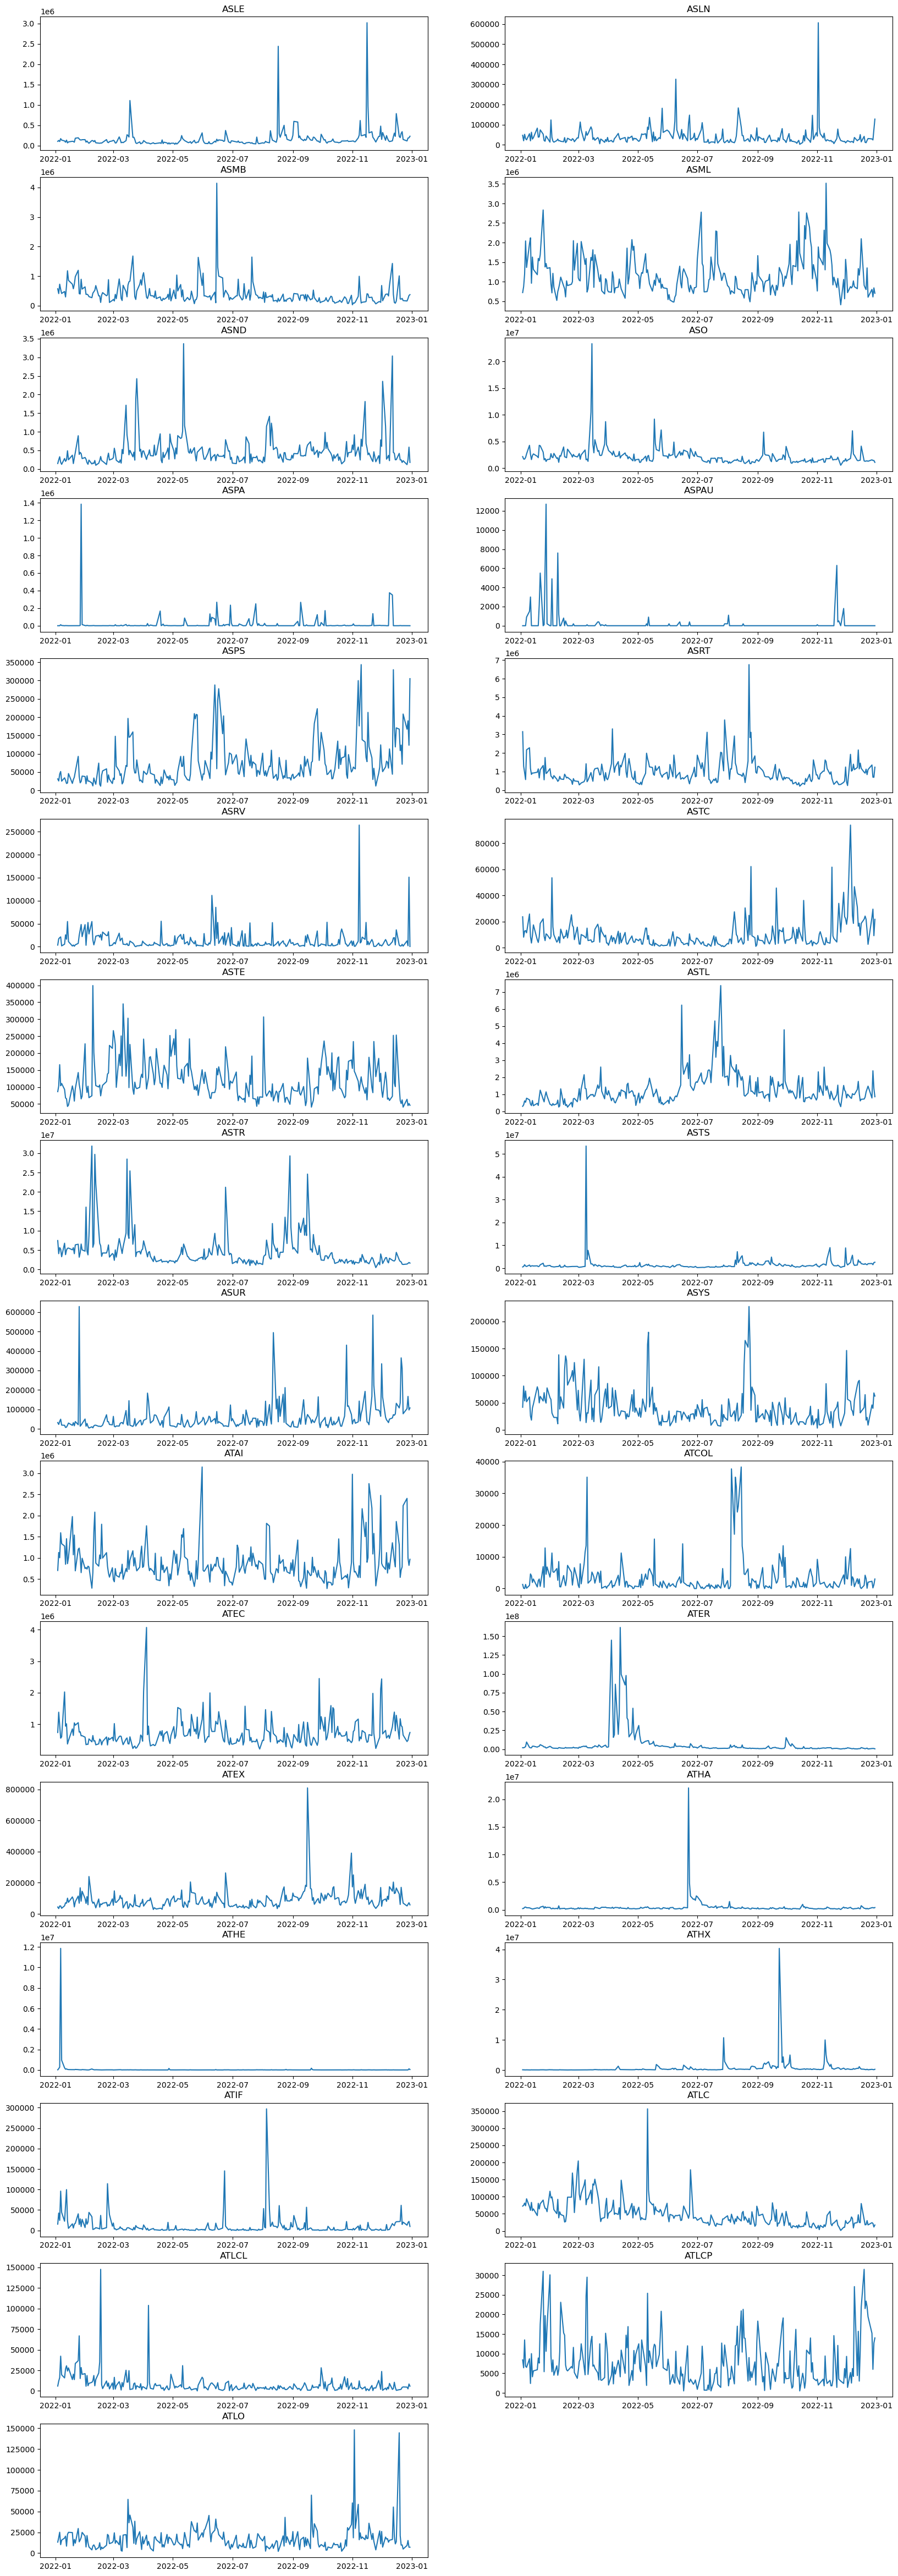

In [64]:
plt.figure(figsize=(20,60))
for i, company in enumerate(ticker_list, 1):
    plt.subplot(16, 2, i)
    data = df[df['Ticker']==company]
    plt.plot(data["Date"],data["Volume"])
    plt.title(company)


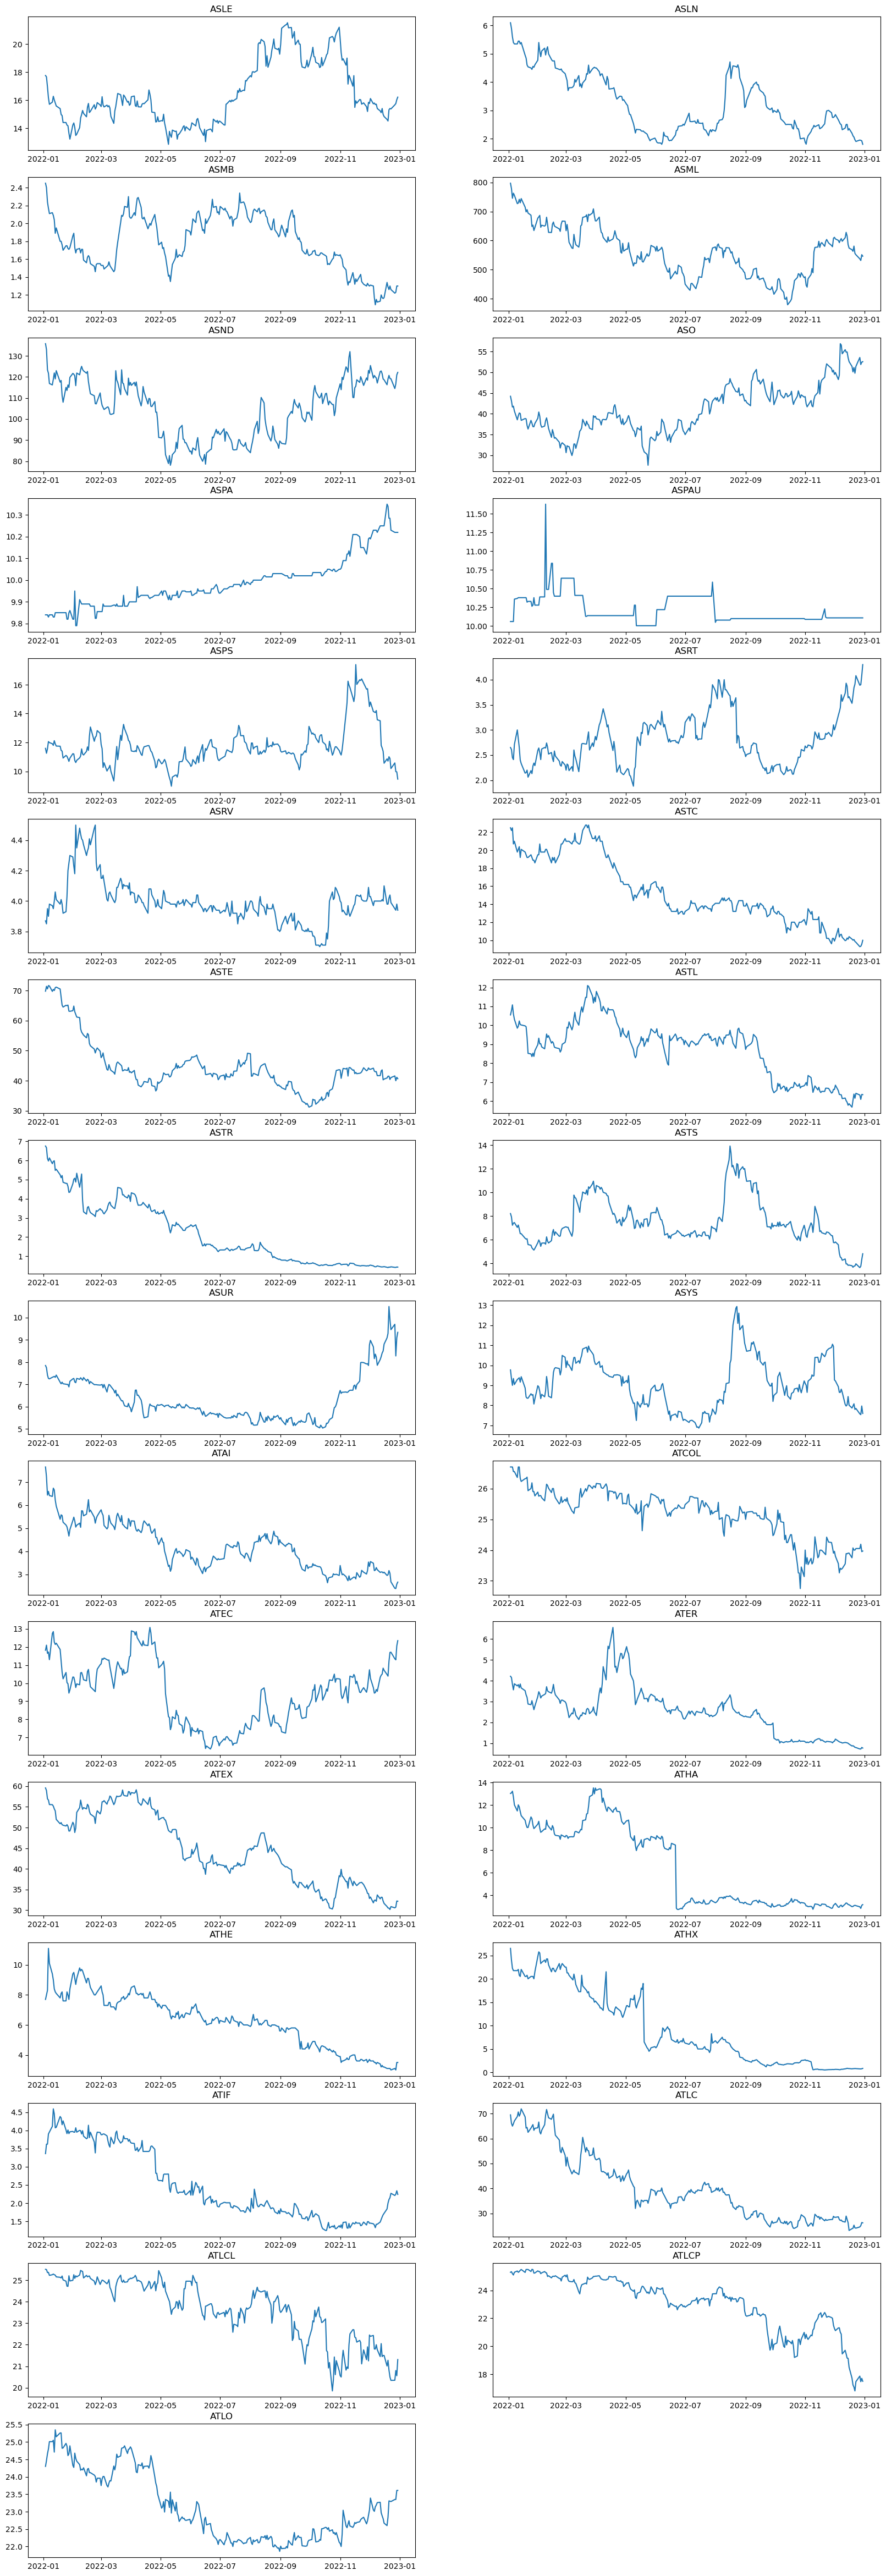

In [68]:
# analyse closing price of all the stocks 
plt.figure(figsize=(20,60))
for i, company in enumerate(ticker_list, 1):
    plt.subplot(16, 2, i)
    data = df[df['Ticker']==company]
    plt.plot(data["Date"],data["Close"])
    plt.title(company)


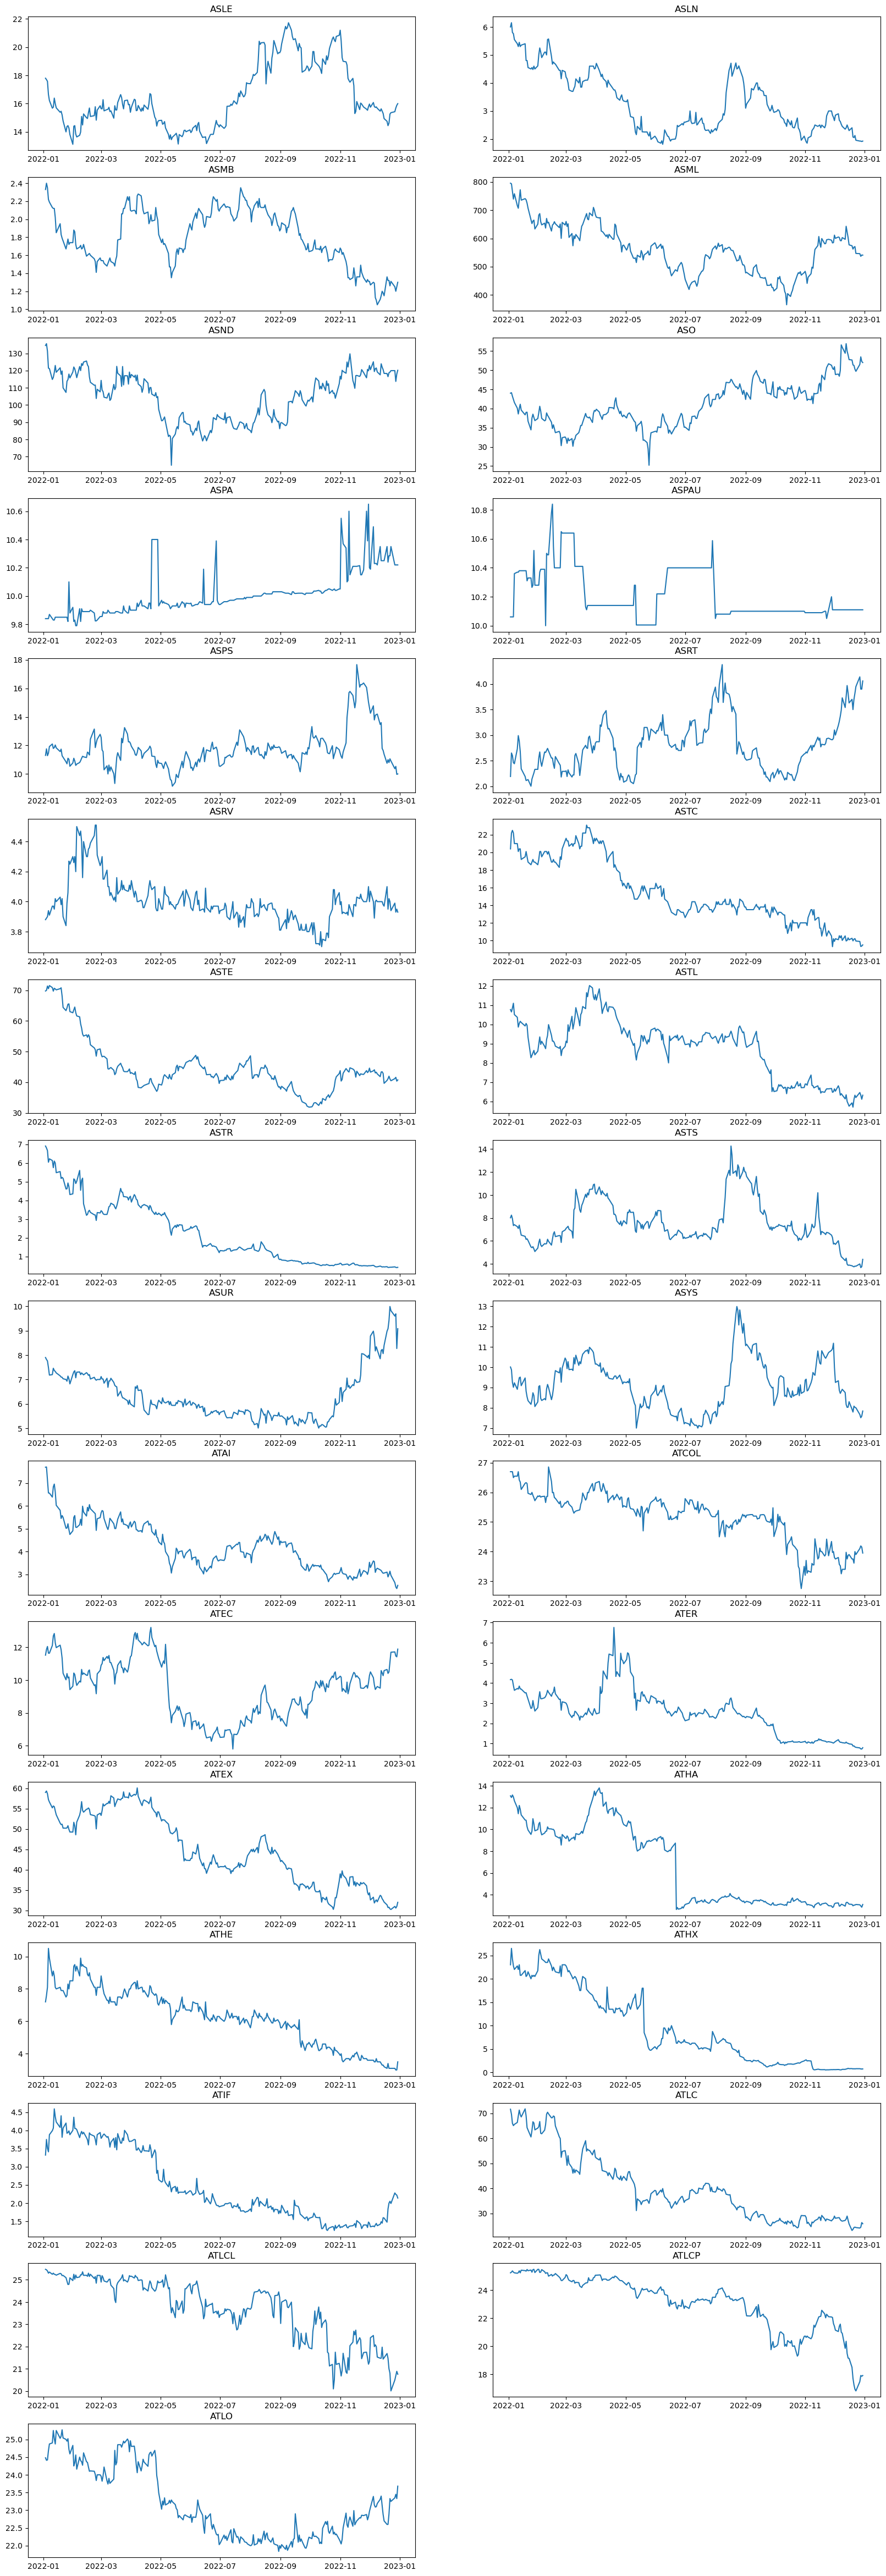

In [69]:
# analyse opening price of all the stocks 
plt.figure(figsize=(20,60))
for i, company in enumerate(ticker_list, 1):
    plt.subplot(16, 2, i)
    data = df[df['Ticker']==company]
    plt.plot(data["Date"],data["Open"])
    plt.title(company)

In [71]:
## get all the numeric features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))

Num of Numerical Features : 7


In [106]:
n_features = [ 'Open', 'High', 'Low', 'Close']

In [107]:
##categorical features
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))

Num of Categorical Features : 1


In [108]:
new_df = df.drop(["Date"], axis=1)

In [109]:
new_df.head()

,Open,High,Low,Close,Volume,Ticker,Target
0,17.799999,18.219000,17.500000,17.760000,106600,ASLE,0
1,17.700001,18.309999,17.620001,17.660000,128700,ASLE,0
2,17.580000,17.799999,16.910000,16.950001,103100,ASLE,0
3,16.650000,16.879999,16.139999,16.170000,173600,ASLE,0
4,16.219999,16.290001,15.630000,15.710000,137800,ASLE,0


In [110]:
X = new_df.drop(["Target"], axis = 1)
y = new_df["Target"]

## Train test split

In [111]:
from sklearn.model_selection import train_test_split
# saprating dataset into train and test 
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((6224, 6), (1557, 6))

In [112]:
# Creating Column Transformer 
# Create Column Transformer with 3 types of transformers 
cat_features = X.select_dtypes(include="object").columns
num_festures = X.select_dtypes(exclude="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop="first", sparse= False)

preprocessor = ColumnTransformer(
    
    [
        ("OneHotEncoder", oh_transformer, cat_features),
        ("StandardScaler", numeric_transformer, n_features)  
    
    ]
)


In [113]:
preprocessor

ColumnTransformer(transformers=[('OneHotEncoder',
                                 OneHotEncoder(drop='first', sparse=False),
                                 Index(['Ticker'], dtype='object')),
                                ('StandardScaler', StandardScaler(),
                                 ['Open', 'High', 'Low', 'Close'])])

In [114]:
pd.DataFrame(X_train)

,Open,High,Low,Close,Volume,Ticker
3519,6.130000,6.130000,5.601000,5.83000,6765400,ASTR
5852,11.040000,11.185000,10.370000,10.53000,226600,ATHA
2576,4.000000,4.010000,3.990000,4.00000,4900,ASRV
3949,7.230000,7.300000,6.860000,6.92000,855500,ASTS
6549,4.020000,4.200000,3.820000,3.95000,44100,ATIF
...,...,...,...,...,...,...
5226,10.500000,10.530000,10.030000,10.05000,455500,ATEC
5390,2.810000,2.835000,2.570000,2.59000,7450400,ATER
860,564.719971,578.020020,563.140015,577.01001,479000,ASML
7603,24.559999,24.830000,24.230000,24.25000,24600,ATLO


In [115]:
# applying Transformation in training data

X_train = preprocessor.fit_transform(X_train)

C:\Users\acer\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning:

`sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.



In [116]:
## apply trasformation on test (transform)
X_test = preprocessor.transform(X_test)

In [117]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,24,25,26,27,28,29,30,31,32,33
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.288297,-0.290264,-0.291683,-0.291067
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.240022,-0.241330,-0.243980,-0.244827
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.309240,-0.310787,-0.307797,-0.309071
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.277482,-0.278938,-0.279090,-0.280343
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,-0.309043,-0.308947,-0.309498,-0.309563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6219,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.245331,-0.247670,-0.247381,-0.249549
6220,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.320940,-0.322161,-0.322001,-0.322943
6221,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,5.203814,5.245879,5.285230,5.328352
6222,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,-0.107092,-0.109240,-0.105342,-0.109846


In [144]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report 
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV 

In [120]:
rf = RandomForestClassifier()

# fit the model 
rf.fit(X_train, y_train)


# predict the set resluts

y_pred = rf.predict(X_test)


In [122]:
# Check accurecy score 
accuracy_score(y_test, y_pred)

0.8015414258188824

In [134]:
# Hyperparameter Training

# defining parameter range
param = {"max_depth": [5, 8, 15, None, 10],
             "max_features":[5, 7, "auto", 8],
             "min_samples_split":[2, 8, 15 , 20],
             "n_estimators": [100, 200, 500, 1000]   
}

In [135]:
param

{'max_depth': [5, 8, 15, None, 10],
 'max_features': [5, 7, 'auto', 8],
 'min_samples_split': [2, 8, 15, 20],
 'n_estimators': [100, 200, 500, 1000]}

In [148]:
# findind the best hyperparameter 
random_search = RandomizedSearchCV(RandomForestClassifier(), 
                                   param) 
random_search.fit(X_train, y_train) 
print(random_search.best_estimator_)


C:\Users\acer\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning:


25 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
25 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\acer\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\acer\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\Users\acer\anaconda3\Lib\site-packages\skle

RandomForestClassifier(max_depth=8, max_features=8, min_samples_split=15,
                       n_estimators=200)


In [149]:
# training model 
rf = RandomForestClassifier(max_depth=8, max_features=8, min_samples_split=15,
                       n_estimators=200)

# fit the model 
rf.fit(X_train, y_train)


# predict the set resluts

y_pred = rf.predict(X_test)


In [150]:
# Check accurecy score 
accuracy_score(y_test, y_pred)

0.8156711624919717